In [1]:
# 1/20/2020 20 threads, 40G
    #read csv: wall time: 7min 45s
    #read dta: Wall time: 1h 3min 45s
    
# 1/21/2020 20 threads, 100G
    #read csv: Wall time: 5min 48s
    #read dta: Wall time: 37min 3s
    
# 1/21/2020 1:54PM, 20 threads, 100G
    #read csv: Wall time: 8min 16s
    #read dta: Wall time: 

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 20)
!date

Thu Jan 30 15:13:32 PST 2020


# 2010 census demo data. Looking into {black alone} and {85+ year olds} to see if can find bias similar to undercount among AIAN

Akee's talk here: https://vimeo.com/380264104

Findings: Slight downward bias in urban 85+ year old population--otherwise looks pretty balanced.

In [3]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK']

aian_cols = ['P0030005','P0060004'] # AIAN alone, AIAN combo
black_cols = ['P0030003','P0060003'] #black alone, black combo
elder = ['P0120025'] #85+ years
keep_cols = location_cols + black_cols + aian_cols + elder

def my_cols(x):
    if x.startswith('P001'):
        return True
    elif x.startswith(('AIAN','AITS','TTRACT','TBLGRP','UA','UR')):
        return True
    else:
        return (x in keep_cols)

In [4]:
%%time

df_dp = pd.read_csv('/home/j/temp/abie/fiftystates2010dhc.csv', usecols=my_cols)

<string>:2: DtypeWarning: Columns (28,32,33,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 13min 22s, sys: 38.8 s, total: 14min
Wall time: 14min 20s


In [42]:
dta_columns = [x.lower() for x in df_dp.columns] #grab col names as lowercase
dta_columns[-6:] = [x.upper() for x in dta_columns[-6:]] #coded vars are capitalized

In [6]:
#checkout how close the distribution of these vars are to AIAN alone
df_dp[['P0030003','P0120025','P0030005']].describe()

,P0030003,P0120025,P0030005
count,1.371779e+07,1.371779e+07,1.371779e+07
mean,1.566265e+02,7.027128e+00,6.094926e+01
std,8.249752e+03,3.286513e+02,5.442057e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,3.073882e+06,2.104250e+05,4.861033e+06


In [7]:
#%%time
#
# r = pd.read_stata('/home/j/temp/abie/all50states_2010ur1_all_vars.dta', columns=dta_columns,
#                   chunksize=100_000, convert_missing=True, preserve_dtypes=False)

# df_sf = pd.DataFrame()
# for t in r:
#     print('.', flush=True, end=' ')
#     df_sf = df_sf.append(t[t.block != ''])
# df_sf.shape

# saved AIAN-relevant vars here; loads faster than the .dta
df_sf = pd.read_csv('/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv')

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# df_sf.to_csv(r'/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv', index = None, header=True)

In [12]:
df_sf.columns = [x.upper() for x in df_sf.columns]

In [43]:
#store columns by type
float_cols = list(df_dp.loc[:, df_dp.dtypes == np.float64].columns)
int_cols = df_dp.loc[:, df_dp.dtypes == np.int64].columns

#conver df_sf to correct dtypes
df_sf.loc[:,float_cols] = df_sf.loc[:,float_cols].astype(np.float64)
df_sf.loc[:,int_cols] = df_sf.loc[:,int_cols].astype(np.int64)

In [44]:
count_vars = list(df_sf.columns[[x.startswith("P0") for x in df_sf.columns]])

In [15]:
left = df_sf[keep_cols + ['P0010001']]
df = pd.merge(left[(left.BLOCK != '')], df_dp.dropna(subset=['BLOCK']), left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))
df

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,STATE,COUNTY,TRACT,BLKGRP,BLOCK,P0030003_SF,P0060003_SF,P0030005_SF,P0060004_SF,P0120025_SF,...,UR,AIANHHNS,AITSNS,AIANHHSC,P0010001_DP,P0030003_DP,P0030005_DP,P0060003_DP,P0060004_DP,P0120025_DP
0,2,13.0,100.0,1.0,1363.0,4,4,5,0,0,...,R,99999999.0,99999999.0,NaN,87,0,0,0,42,0
1,2,13.0,100.0,1.0,1366.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
2,2,13.0,100.0,1.0,1369.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
3,2,13.0,100.0,1.0,1370.0,0,0,0,0,0,...,R,2418758.0,99999999.0,NaN,0,0,0,0,0,0
4,2,13.0,100.0,1.0,1371.0,180,182,438,27,1,...,R,2418758.0,99999999.0,NaN,988,130,361,149,129,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071785,56,45.0,951100.0,1.0,1868.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071786,56,45.0,951100.0,1.0,1869.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071787,56,45.0,951100.0,1.0,1870.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071788,56,45.0,951100.0,1.0,1871.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0


# changes in 85+ year olds

In [34]:
count_vars_sfdp = [s + "_SF" for s in count_vars]+[s + "_DP" for s in count_vars]
tract_df = df.groupby(['STATE','COUNTY','TRACT'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

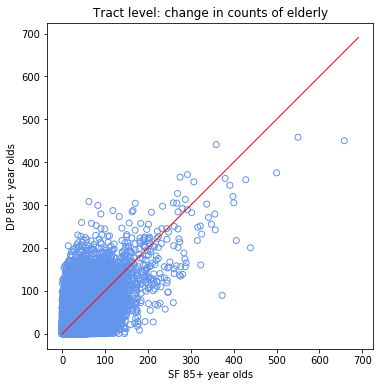

In [19]:
# change in counts of elderly / tract level
x = tract_df[["P0120025_SF"]]
y = tract_df[["P0120025_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+ year olds')
plt.ylabel('DP 85+ year olds')
plt.title('Tract level: change in counts of elderly')

plt.show()

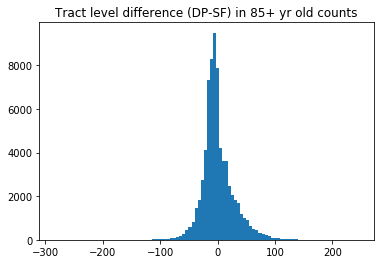

In [20]:
tract_df[['P0120025_SF','P0120025_DP']].describe()
tract_df['abs_diff_age'] = tract_df['P0120025_DP'] - tract_df['P0120025_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(tract_df[(tract_df.P0120025_DP!=0) | (tract_df.P0120025_SF!=0)].abs_diff_age, bins = 100)

plt.title('Tract level difference (DP-SF) in 85+ yr old counts')

plt.show()

In [21]:
#looks like on average the skew is on average slightly positive?
tract_df[(tract_df.P0120025_DP!=0) | (tract_df.P0120025_SF!=0)].abs_diff_age.describe()

count    71652.000000
mean         0.109641
std         28.100038
min       -284.000000
25%        -15.000000
50%         -5.000000
75%         12.000000
max        246.000000
Name: abs_diff_age, dtype: float64

In [22]:
county_level = df.groupby(['STATE','COUNTY',])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

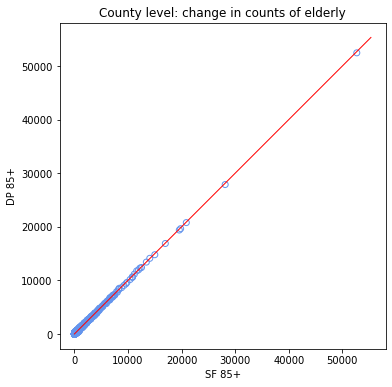

In [35]:
# change in counts of elderly / county level
x = county_level[["P0120025_SF"]]
y = county_level[["P0120025_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('County level: change in counts of elderly')

plt.show()

In [31]:
blkgrp_df = df.groupby(['STATE','COUNTY','TRACT','BLKGRP'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

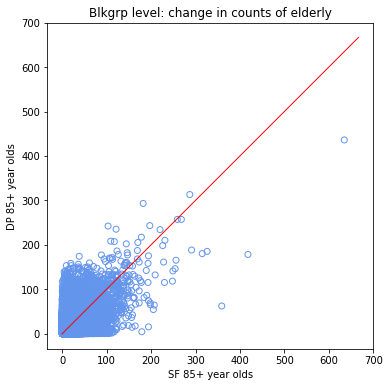

In [32]:
# change in counts of elderly / blkgrp level
x = blkgrp_df[["P0120025_SF"]]
y = blkgrp_df[["P0120025_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+ year olds')
plt.ylabel('DP 85+ year olds')
plt.title('Blkgrp level: change in counts of elderly')

plt.show()

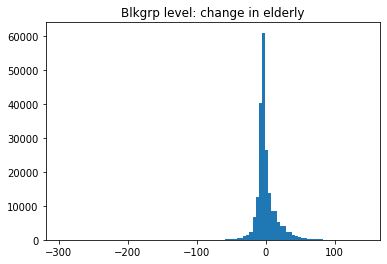

In [37]:
blkgrp_df['abs_diff_age'] = blkgrp_df['P0120025_DP'] - blkgrp_df['P0120025_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(blkgrp_df[(blkgrp_df.P0120025_DP!=0) | (blkgrp_df.P0120025_SF!=0)].abs_diff_age, bins = 100)

plt.title('Blkgrp level: change in elderly')

plt.show()

In [38]:
blkgrp_df[(blkgrp_df.P0120025_DP!=0) | (blkgrp_df.P0120025_SF!=0)].abs_diff_age.describe()

count    208397.000000
mean          0.037697
std          15.019096
min        -297.000000
25%          -7.000000
50%          -3.000000
75%           3.000000
max         144.000000
Name: abs_diff_age, dtype: float64

# checkout urban elderly

In [49]:
urban = df[df.UR=='U'].copy(deep=True)

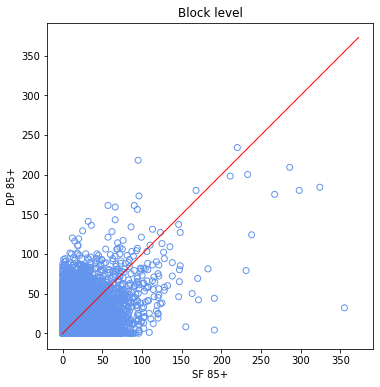

In [40]:
#old v new
x = urban[["P0120025_SF"]]
y = urban[["P0120025_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('Block level')

plt.show()

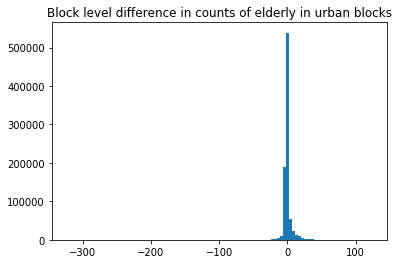

In [56]:
urban['abs_diff_elderly'] = urban['P0120025_DP'] - urban['P0120025_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban[(urban.P0120025_DP!=0) | (urban.P0120025_SF!=0)].abs_diff_elderly, bins = 100)

plt.title('Block level difference in counts of elderly in urban blocks')

plt.show()

In [57]:
urban[(urban.P0120025_DP!=0) | (urban.P0120025_SF!=0)].abs_diff_elderly.describe()

count    857156.000000
mean         -0.061212
std           5.515205
min        -323.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max         123.000000
Name: abs_diff_elderly, dtype: float64

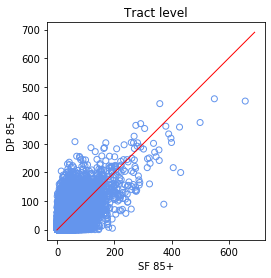

In [41]:
urban_tract = urban.groupby(['STATE','COUNTY','TRACT'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

#old v new
x = urban_tract[["P0120025_SF"]]
y = urban_tract[["P0120025_DP"]]

fig = plt.figure() 
#fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('Tract level')

plt.show()

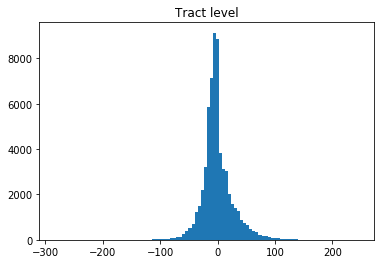

In [24]:
urban_tract['abs_diff_age'] = urban_tract['P0120025_DP'] - urban_tract['P0120025_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_tract[(urban_tract.P0120025_DP!=0) | (urban_tract.P0120025_SF!=0)].abs_diff_age, bins = 100)

plt.title('Tract level')

plt.show()

In [26]:
urban_tract.abs_diff_age.describe()

count    64676.000000
mean        -0.811244
std         26.282572
min       -284.000000
25%        -14.000000
50%         -4.000000
75%          9.000000
max        246.000000
Name: abs_diff_age, dtype: float64

# checkout black alone pop

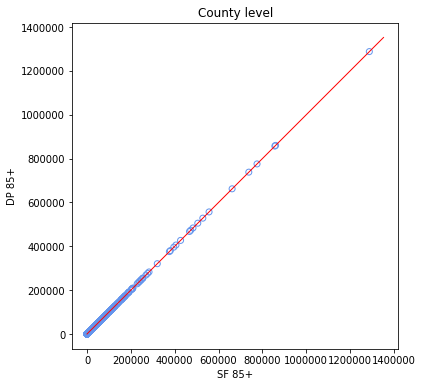

In [27]:
#County level, changes in counts of black alone pop
x = county_level[["P0030003_SF"]]
y = county_level[["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('County level: black alone change')

plt.show()

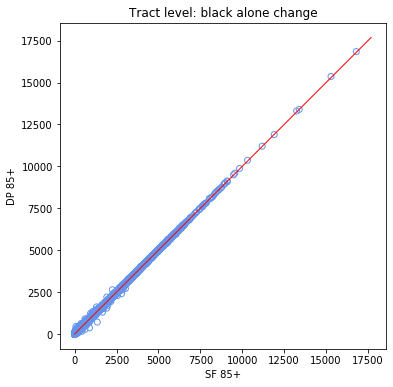

In [45]:
#Tract level, changes in counts of black alone pop
x = tract_df[["P0030003_SF"]]
y = tract_df[["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('Tract level: black alone change')

plt.show()

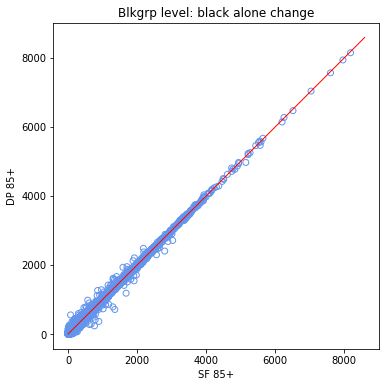

In [47]:
#Blkgrp level, changes in counts of black alone pop
x = blkgrp_df[["P0030003_SF"]]
y = blkgrp_df[["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF 85+')
plt.ylabel('DP 85+')
plt.title('Blkgrp level: black alone change')

plt.show()

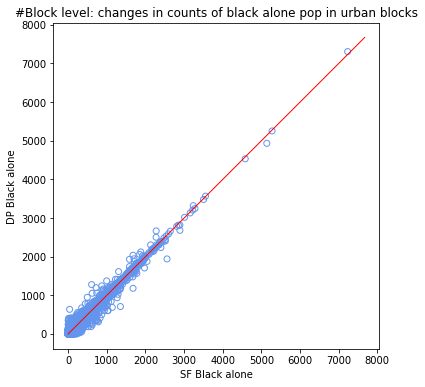

In [50]:
#Block level: changes in counts of black alone pop in urban blocks
x = urban[["P0030003_SF"]]
y = urban[["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF Black alone')
plt.ylabel('DP Black alone')
plt.title('Block level: changes in counts of black alone pop in urban blocks')

plt.show()

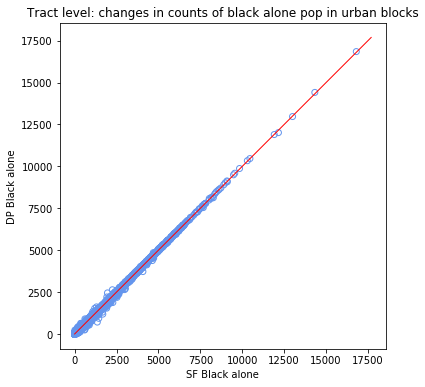

In [52]:
urban_tract

#Tract level: changes in counts of black alone pop in urban blocks
x = urban_tract[["P0030003_SF"]]
y = urban_tract[["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF Black alone')
plt.ylabel('DP Black alone')
plt.title('Tract level: changes in counts of black alone pop in urban blocks')

plt.show()

# urban alone?

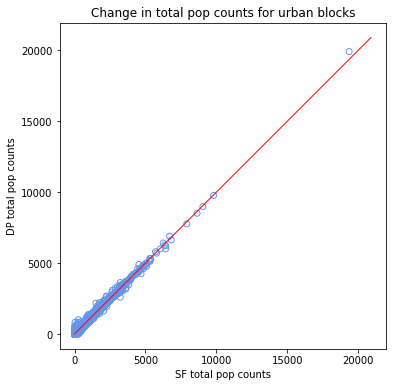

In [53]:
#Block level: changes in counts of black alone pop in urban blocks
x = urban[["P0010001_SF"]]
y = urban[["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF total pop counts')
plt.ylabel('DP total pop counts')
plt.title('Change in total pop counts for urban blocks')

plt.show()